In [81]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler


In [82]:
#Reading data
df = pd.read_csv("energydata_complete.csv")

In [83]:
#Number of rows
len(df)

19735

In [84]:
#showing csv
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [85]:
#showing first row to see all columns

df.iloc[13] 

date           2016-01-11 19:10:00
Appliances                     250
lights                          40
T1                           20.26
RH_1                       52.7267
T2                           19.73
RH_2                          45.1
T3                           19.89
RH_3                       45.4933
T4                              19
RH_4                       47.2233
T5                            17.1
RH_5                       55.1633
T6                          6.0675
RH_6                        88.215
T7                         17.9633
RH_7                         46.16
T8                         18.0333
RH_8                       48.6667
T9                           16.89
RH_9                       45.3267
T_out                            6
Press_mm_hg                734.617
RH_out                        90.5
Windspeed                        6
Visibility                      40
Tdewpoint                  4.51667
rv1                        19.2052
rv2                 

In [86]:
#get Lsit of all column names
cl_list = list(df)
cl_list

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [87]:
#delete appliances and lights column of colums list and save it at variables y_a & y_l 
cl_list.remove("Appliances")
y_a = "Appliances"

cl_list.remove("lights")
y_l = "lights"

#remove date, rv1 and rv2 because they are not relevant
cl_list.remove("date")
cl_list.remove("rv1")
cl_list.remove("rv2")


In [88]:
#Define X and y for model
X = df[cl_list]
y = df[[y_a, y_l]]

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)



In [89]:
#create test and training data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
#X_train_appliances, X_test_appliances, y_train_appliances, y_test_appliances = train_test_split(X, y_appliances, random_state = 0)

In [90]:
knr = KNeighborsRegressor(n_neighbors = n_neighbors)
regr = MultiOutputRegressor(knr)
regr.fit(X_train, y_train)

print("Training set score: {:.2f}".format(regr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regr.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.43


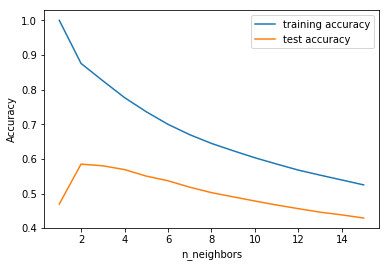

In [91]:
#testing best number of neigbours
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = range(1, 16)

#train model for all range of neigbours to get data for graph
for n_neighbors in neighbors_settings:
    knr = KNeighborsRegressor(n_neighbors = n_neighbors)
    regr = MultiOutputRegressor(knr)
    regr.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(regr.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(regr.score(X_test, y_test))

#plot graph
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [92]:
#Ridge Regression

#train model
ridge = Ridge(alpha=0.1, solver="cholesky", random_state=1)
regr = MultiOutputRegressor(ridge)
regr.fit(X_train, y_train)

#evalute Predictions
print("Training set score: {:.2f}".format(regr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regr.score(X_test, y_test)))

Training set score: 0.19
Test set score: 0.17


In [93]:
#Lasso Regression

#train model
lasso = Lasso(alpha=0.1)
regr = MultiOutputRegressor(lasso)
regr.fit(X_train, y_train)

print("Training set score: {:.2f}".format(regr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regr.score(X_test, y_test)))

Training set score: 0.09
Test set score: 0.08


In [94]:
#Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)

regr = MultiOutputRegressor(tree_reg)
regr.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(regr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(regr.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.316


In [95]:
#random forest
forest = RandomForestRegressor(n_estimators=18, random_state=1)

regr = MultiOutputRegressor(forest)
regr.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(regr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(regr.score(X_test, y_test)))

Accuracy on training set: 0.934
Accuracy on test set: 0.587


In [96]:
#Neural Network - keras

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'